In [84]:
# Import Libraries 
#nltk.download('omw-1.4')
#nltk.download('stopwords')
#nltk.download('wordnet')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


# Libraries for sentiment analysis 
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import wordcloud


# to avoid warnings 
import warnings 
warnings.filterwarnings('ignore')


# Loading dataset 
trump = pd.read_csv("hashtag_donaldtrump.csv",lineterminator='\n')
trump['candidate'] = 'trump'
biden = pd.read_csv("hashtag_joebiden.csv",lineterminator='\n')
biden['candidate'] = 'biden'


# concatenate two datasets before cleaning it
dataset = pd.concat([trump,biden])
print(dataset.shape)
print(dataset.head(2))



(1747805, 22)
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   

                  user_location       lat      long  city  \
0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   NaN   
1                           NaN       NaN       NaN   NaN   

                    country      continent

In [85]:
# # Data Cleaning process 
# Dropping missing values 
dataset.dropna(inplace=True)
print(dataset.shape)

(345224, 22)


In [86]:
# check the unique county names 
dataset['country'].value_counts()

# EDA (Exploratory Data Analysis)
# Group by candidate 
tweet_count = dataset.groupby('candidate')['tweet'].count().reset_index()
print(tweet_count.head())
# ['tweet'].count().reset_index()

# Building bar chart candidate wise to know tweets 
fig  = px.bar(tweet_count,x= 'candidate',y='tweet',color='candidate',title= 'Tweets by candidate')
# show the chart
fig.show() # It shows Trump received more number of tweets compared to biden 






  candidate   tweet
0     biden  155948
1     trump  189276


In [68]:
# comparison of likes 
likes_comparison = dataset.groupby('candidate')['likes'].sum().reset_index()
# Building bar chart candidate wise to know tweets 
fig  = px.bar(likes_comparison,x= 'candidate',y='likes',color='candidate',title= 'Comparison of Likes ')
fig.show() # More number of likes to Biden compared to Trump

In [33]:
# Top 10 country wise tweets 
country_wise = dataset.groupby(['country','candidate'])['tweet'].count().reset_index()
# top_10_countries = country_wise.head(10)
# Candidate for top 10 country tweet
tweeters = country_wise[country_wise['country'].isin(top10countries.country)]
fig = px.bar(top_10_countries,x='country',y='tweet',title='Country wise tweets',color = 'candidate')
fig.show()


In [ ]:
# count = 0
# from tqdm import tqdm
# Sentiment analysis prediction 
from nltk.corpus import stopwords
lm = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def clean(text):
    global count 
    # Remove URL references
    text = re.sub(r'https?://\S+|www\,S+',' ',str(text))
    text = text.lower() # Lower case
    text = re.sub('[^a-z]',' ',text)
    words = text.split()

    # Lemmatizer words and remove words 
    words = [lm.lemmatize(word) for word in words if word not in stopwords]
    
    # tqdm.pandas()
    '''if count>100000:
        print('clean text iterations completed,',count)
        count = 0 '''
    
    # Join the words back into a sentence 
    count = count + 1 
    return ' '.join(words)
    

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
    

trump_tweets = dataset[dataset['candidate']=='trump']
#trump_tweets = trump_tweets.loc[trump_tweets.country =='US']
trump_tweets = trump_tweets[['tweet']]
print(trump_tweets.head())

# calling clean function 
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
print(trump_tweets.head())

# Subjectivity - Subjective means sentence refers to a personal opinion and not facts whereas objective means facts
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

# Polarity - float value between -1 and 1 (1 is positive and -1 is negative sentiment)
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

# Based on polarity get the analysis 
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
print(trump_tweets.head())


# Repeat same steps for Biden 
biden_tweets = dataset[dataset['candidate']=='biden']
biden_tweets = biden_tweets[['tweet']]
print(biden_tweets.head())

# calling clean function 
biden_tweets['cleantext'] = biden_tweets['tweet'].apply(clean)
print(biden_tweets.head())

# Subjectivity - Subjective means sentence refers to a personal opinion and not facts whereas objective means facts
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)

# Polarity - float value between -1 and 1 (1 is positive and -1 is negative sentiment)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)

# Based on polarity get the analysis 
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
print(biden_tweets.head())



                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
13  @Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...
                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
13  @Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
13  susan hutch joebiden ukraine realdonaldtrump i...

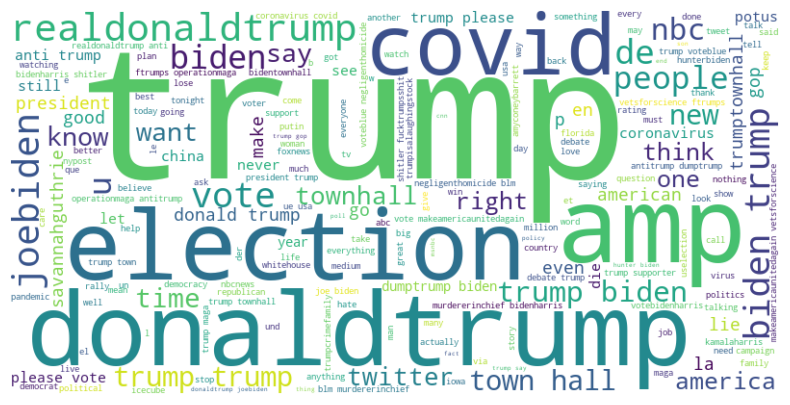

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine first 5000 clean tweats to string 
text =  ' '.join(trump_tweets['cleantext'][:5000])

# Generate the wordcloud 
wc = WordCloud(width = 800, height = 400,background_color = 'white').generate(text)

# Display
plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

analysis
neutral     52.940083
positive    34.315926
negative    12.743992
Name: proportion, dtype: float64


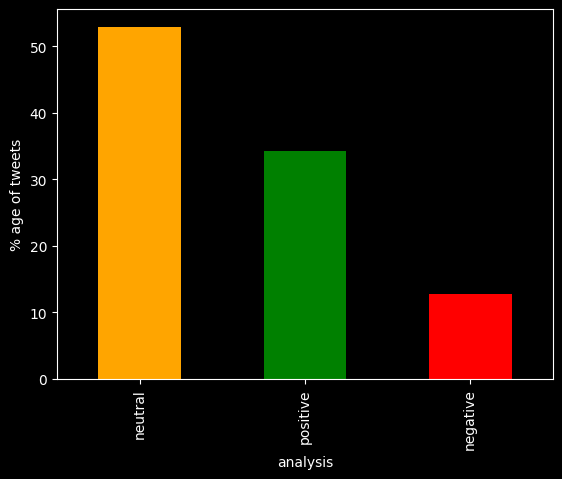

In [98]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

print(biden_tweets.analysis.value_counts(normalize=True)*100)
# colors 
colors = ['orange','green','red']
plt.ylabel(r"% age of tweets")
#plt.figure(figsize=(7,5))
(biden_tweets.analysis.value_counts(normalize=True)*100).plot.bar(color=colors)
plt.show()



analysis
neutral     51.466113
positive    30.327141
negative    18.206746
Name: proportion, dtype: float64


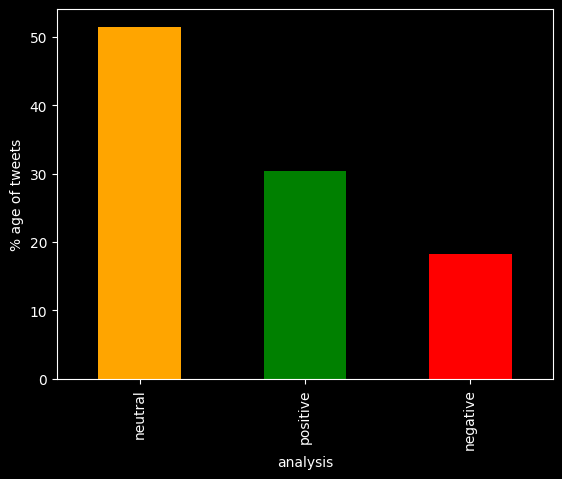

In [101]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

print(trump_tweets.analysis.value_counts(normalize=True)*100)
# colors 
colors = ['orange','green','red']
plt.ylabel(r"% age of tweets")
#plt.figure(figsize=(7,5))
(trump_tweets.analysis.value_counts(normalize=True)*100).plot.bar(color=colors)
plt.show()